# Homework 1

* Due: 2024/06/21 (Fri) 16:59
* Submit via Google Classroom

In [ ]:
import itertools
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import scale, StandardScaler
from tqdm import tnrange
%matplotlib inline

np.random.seed(0)

BASE_DIR = 'https://gitlab.com/machine-learning-course1/ml-practice-kt-2024-summer/-/raw/main'

## 1. Backward Selection

### 1.1. Load dataset
The credit dataset is a use case for linear regression where some predictors are qualitative.

In [ ]:
credit = pd.read_csv(f'{BASE_DIR}/Data/Credit.csv')
credit = credit.drop(columns=['Unnamed: 0'])
credit.head(3)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580

### 1.2. Encoding qualitative data

In [ ]:
credit = pd.get_dummies(credit, columns=['Gender', 'Student','Married', 'Ethnicity'], drop_first=True)
credit.head(3)

Income  Limit  Rating  Cards  Age  Education  Balance  Gender_Female  \
0   14.891   3606     283      2   34         11      333          False   
1  106.025   6645     483      3   82         15      903           True   
2  104.593   7075     514      4   71         11      580          False   

   Student_Yes  Married_Yes  Ethnicity_Asian  Ethnicity_Caucasian  
0        False         True            False                 True  
1         True         True             True                False  
2        False        False             True                False

### 1.3. Helper function for fitting linear regression (Sklearn)

In [ ]:
def fit_linear_reg(X, Y_true):
    """Fit linear regression model and return RSS and R squared values"""
    model_k = LinearRegression()
    Y_pred = model_k.fit(X, Y_true).predict(X)
    RSS = mean_squared_error(Y_true, Y_pred) * len(Y)
    R_squared = model_k.score(X, Y_true)
    return RSS, R_squared

### 1.4. Exercise - Backward stepwise selection
For computational reasons, the best subset cannot be applied for any large $n$ due to the $2^n$ complexity.
Backward Stepwise begins with a model containing all predictors, and then removes predictors to the model, one at the time.
At each step, the variable that gives the smallest additional improvement to the fit is removed from the model.

1. Implement Backward stepwise selection (Refer to Section 5.9. of Lab 2)
2. Display the results of the first 4 steps (Refer to Section 5.10. of Lab 2)

In [ ]:
# Implement Backward stepwise selection (Refer to Section 5.9. of Lab 2)
# Initialization variables
Y = credit['Balance']
X = credit.drop(columns=['Balance'])

remaining_features = list(X.columns)
RSS_dict, R_squared_dict, features_dict = {}, {}, {}

for k in tnrange(len(X.columns), 0, -1):

    best_RSS = np.inf
    for features in itertools.combinations(remaining_features, k):
        features = list(features)

        ############### YOUR CODE STARTS HERE ###############


    ############### YOUR CODE ENDS HERE #################

  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
# Display the results of the first 4 steps (Refer to Section 5.10. of Lab 2)
print('Backward stepwise subset selection')
print('Number of features |', '   RSS    |', 'Features')

for k in range(len(X.columns), 5, -1):
    print(f'{k:^19}|{round(RSS_dict[k]):^11}| {features_dict[k]}')

Backward stepwise subset selection
Number of features |    RSS    | Features
        11         |  3786730  | ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian']
        10         |  3791345  | ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian']
         9         |  3798367  | ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian']
         8         |  3804746  | ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Gender_Female', 'Student_Yes', 'Ethnicity_Asian']
         7         |  3810759  | ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Gender_Female', 'Student_Yes']
         6         |  3821620  | ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes']


## 2. Ridge and Lasso

### 2.1. Load dataset
Apply Ridge and Lasso regression to Auto dataset (f'{BASE_DIR}/Data/Auto.csv')
($Y$ : mpg)

In [ ]:
alphas = 5**np.linspace(-2, 10, 100) * 0.5

auto = pd.read_csv(f'{BASE_DIR}/Data/Auto.csv', na_values=['?']).dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [ ]:
auto = pd.get_dummies(auto, columns=['origin'], drop_first=True)
auto = auto.drop(columns=['name'])
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin_2      392 non-null    bool   
 8   origin_3      392 non-null    bool   
dtypes: bool(2), float64(4), int64(3)
memory usage: 25.3 KB


In [ ]:
Y = auto['mpg']
X = auto.drop(columns=['mpg'])

### 2.2. Prepare train / test data
(train_test_split)


In [ ]:
# Prepare train / test data (train_test_split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
scaler = StandardScaler().fit(X_train)

### 2.3. Ridge Regression

#### 2.3.1. Find optimal alpha coefficient using cross validation (refer to 6.2.4. of Lab 2)

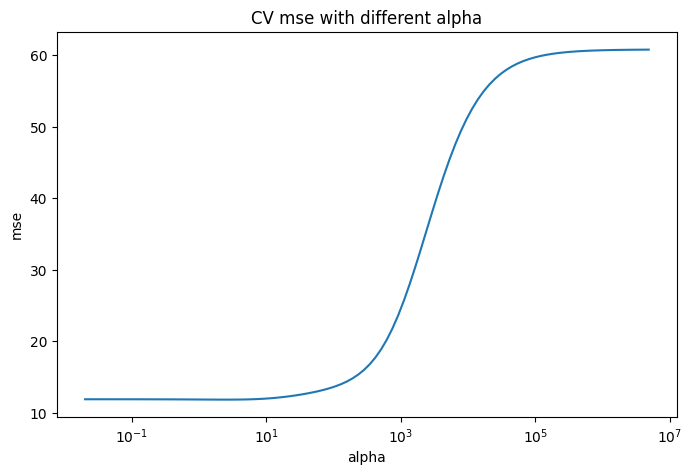

In [ ]:
# Find optimal alpha coefficient using cross validation (refer to 6.2.4. of Lab 2)
mses = []

############### YOUR CODE STARTS HERE ###############


############### YOUR CODE ENDS HERE #################

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(alphas, mses)

ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('mse')
ax.set_title('CV mse with different alpha')
plt.show()

#### 2.3.2. Verify the result using test data (refer to 6.2.5. of Lab 2)

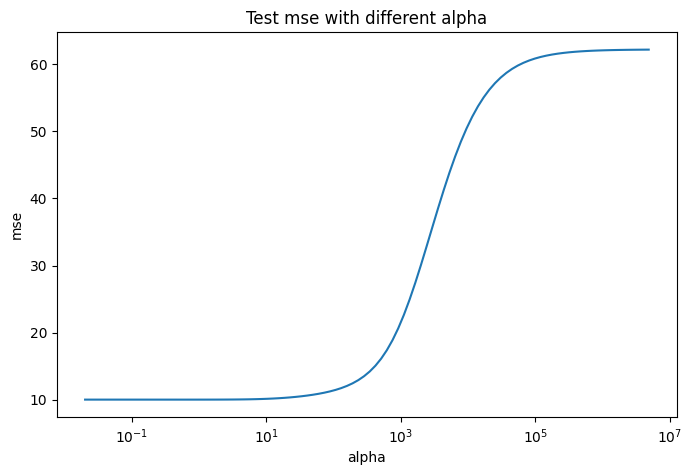

In [ ]:
# Verify the result using test data (refer to 6.2.5 of Lab 2)
mses = []

############### YOUR CODE STARTS HERE ###############


############### YOUR CODE ENDS HERE #################

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(alphas, mses)

ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('mse')
ax.set_title('Test mse with different alpha')
plt.show()

#### 2.3.3. Try RidgeCV (refer to 6.2.6. of Lab 2)

In [ ]:
# Try RidgeCV (refer to 6.2.6. of Lab 2)

############### YOUR CODE STARTS HERE ###############


############### YOUR CODE ENDS HERE #################

RidgeCV(alphas=array([2.00000000e-02, 2.43082465e-02, 2.95445425e-02, 3.59088012e-02,
       4.36439996e-02, 5.30454551e-02, 6.44721001e-02, 7.83601852e-02,
       9.52399351e-02, 1.15755791e-01, 1.40691016e-01, 1.70997595e-01,
       2.07832585e-01, 2.52602285e-01, 3.07015931e-01, 3.73150948e-01,
       4.53532262e-01, 5.51228702e-01, 6.69970160e-01, 8.14289991e-01,
       9.89698093e-01, 1.20289126e+0...
       5.49574280e+04, 6.67959354e+04, 8.11846033e+04, 9.86727677e+04,
       1.19928098e+05, 1.45762089e+05, 1.77161040e+05, 2.15323712e+05,
       2.61707094e+05, 3.18082028e+05, 3.86600818e+05, 4.69879399e+05,
       5.71097214e+05, 6.94118595e+05, 8.43640297e+05, 1.02537082e+06,
       1.24624833e+06, 1.51470558e+06, 1.84099184e+06, 2.23756418e+06,
       2.71956308e+06, 3.30539050e+06, 4.01741235e+06, 4.88281250e+06]),
        scoring='neg_mean_squared_error')

In [ ]:
# Print ridgecv.alpha_
ridgecv.alpha_

2.1597191592564764

### 2.4. Lasso Regression

#### 2.4.1. Find optimal alpha coefficient using cross validation (refer to 7.1.2. of Lab 2)

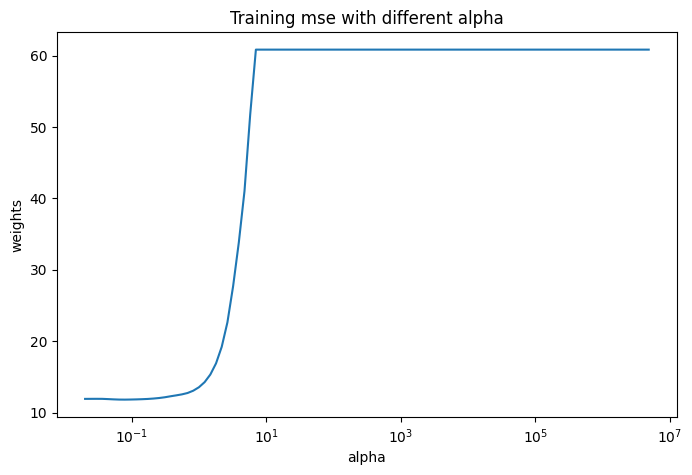

In [ ]:
# CV MSE
mses = []

############### YOUR CODE STARTS HERE ###############


############### YOUR CODE ENDS HERE #################

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(alphas, mses)

ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('weights')
ax.set_title('Training mse with different alpha')
plt.show()

#### 2.4.2. Verify the result using test data (refer to 7.1.3. of Lab 2)

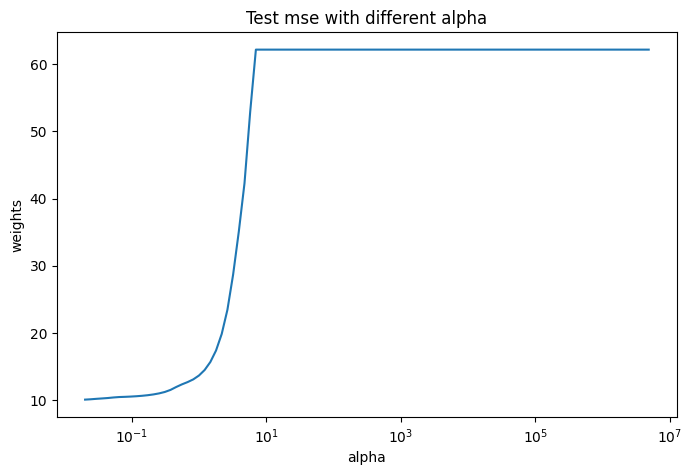

In [ ]:
# Test MSE
mses = []

############### YOUR CODE STARTS HERE ###############


############### YOUR CODE ENDS HERE #################

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(alphas, mses)

ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('weights')
ax.set_title('Test mse with different alpha')
plt.show()

#### 2.4.3. Try LassoCV (refer to 7.1.4. of Lab 2)

In [ ]:
# Try LassoCV

############### YOUR CODE STARTS HERE ###############


############### YOUR CODE ENDS HERE #################

LassoCV(cv=10, max_iter=10000)

In [ ]:
# Print lassocv.alpha_
lassocv.alpha_

0.07455994494995966